In [3]:
from src.halo_mass_function import HaloMassFunction
from src.halo_merger_rate import HaloMergerRateDensity
from src.bh_merger_rate import BHMergerRateDensity
from src.sgwb import SGWBEnergyDensity
from src.bh_halo_interp import BHhaloInterp
# from src.bh_merger_rate_traditional import BHMergerRateDensityTrad

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### Halo mass function

Text(0, 0.5, 'dn/dM  [Mpc$^{-3} M_\\odot^{-1}$]')

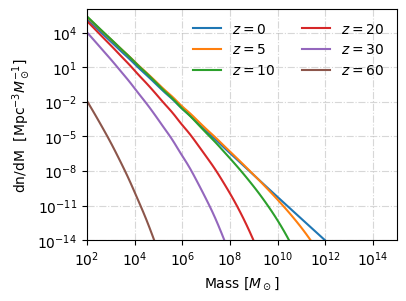

In [6]:
h = 0.674
mass = np.logspace(2, 15, 100)

plt.figure(figsize = (4,3))
for z in [0, 5, 10, 20, 30 , 60]:
    halo = HaloMassFunction(z)
    dn_dm = halo.dndm(mass/ h)
    plt.plot(mass, dn_dm, label = f'$z = {z}$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e15)
plt.ylim(1e-14, 1e6)
# plt.ylim(1e-7, 5e7)
plt.legend(ncol = 2, frameon = False)
# plt.ylabel()

plt.grid(linestyle = '-.', alpha = 0.5)
plt.xlabel('Mass [$M_\\odot$]')
plt.ylabel('dn/dM  [Mpc$^{-3} M_\\odot^{-1}$]')
# plt.savefig('figures/HaloMassFunction', dpi = 100, bbox_inches='tight')

### Halo merger rate density

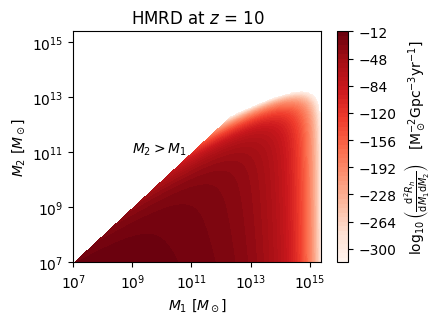

At z = 10, the total merger rate is R_h = 9.0e+01 yr^-1 Gpc^-3


In [5]:
h = 0.674
z = 10.
halo = HaloMassFunction(z)
hmd = HaloMergerRateDensity(halo)

mass1 = np.logspace(7, 15.4, 200)  # Msun
mass2 = np.logspace(7, 15.4, 200)  # Msun
M1_grid, M2_grid = np.meshgrid(mass1, mass2)

# Merger rate density
Rh = hmd.compute_Rh(M1_grid/h, M2_grid/h) # Div by h to set the right input type
if np.any(np.isnan(Rh)):
    print("Array contains NaN values")

plt.figure(figsize=(4,3), dpi = 100)
np.seterr(divide='ignore') # Careful, this is to prevent error msg for the log10(0) but it might suppress other errors too
contour = plt.contourf(M1_grid, M2_grid, np.log10(Rh * 1e9), levels=50, cmap='Reds')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(contour, label=r'$\log_{10} \left( \frac{\mathrm{d}^2 R_h}{\mathrm{d}M_1 \mathrm{d}M_2} \right) \quad [\rm M_\odot^{-2} \rm{Gpc}^{-3} \rm{yr}^{-1}]$')
plt.xlabel(r'$M_1 \ [M_\odot]$')
plt.ylabel(r'$M_2 \ [M_\odot]$')
plt.title(f'HMRD at $z$ = {z:.0f}')
plt.text(1e9, 1e11, '$M_2 > M_1$')
# plt.xlim(1e4, 1e13)
# plt.ylim(1e4, 1e13)
plt.show()

# Integrate over m1 for each m2
integral_m1 = np.trapezoid(Rh * 1e9, x=mass1, axis=1)  # Integrate over m1 for each m2
# Integrate the result over m2
Rh_summed = np.trapezoid(integral_m1, x=mass2)  # Integrate over m2
print(f"At z = {z:.0f}, the total merger rate is R_h = {Rh_summed :.1e} yr^-1 Gpc^-3")